Dataset Link: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset/data

In [2]:
!pip install kaggle -q

**Importing the Dependencies**

In [3]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

**Data Collection**

In [4]:
kaggle_config = json.load(open("kaggle.json"))  # login to kaggle > verify account > profile icon > settings > create new API token

In [5]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [6]:
# Set the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [7]:
# loadig the dataset using kaggle api
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
spotify-million-song-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!ls

kaggle.json  spotify-million-song-dataset.zip
sample_data  spotify_millsongdata.csv


In [9]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

Copy path from file "spotify_millsongdata.csv"
and paste


In [10]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("/content/spotify_millsongdata.csv")

**Initial Understanding**

In [11]:
df.shape

(57650, 4)

It contains 57650 rows and 4 columns

In [12]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [13]:
df.info() #for checking any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [14]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [15]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [16]:
df = df.sample(15000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [17]:
df.shape

(15000, 3)

In [18]:
df.head()

,artist,song,text
0,Helloween,Sun 4 The World,Forty million years ago \r\nThere was a boy c...
1,Quiet Riot,Picking Up The Pieces,"Take cover, young lovers, \r\nFall apart at t..."
2,Xandria,Ginger,Something infests me when I'm alone \r\nIt's ...
3,Kid Rock,I'm A Dog,See me ride across the country with my shotty ...
4,Whiskeytown,Choked Up,I don't know why we can't talk \r\nEvery time...


In [19]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna()) #Dropping missing values and joining 'text' content with some space between
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

WordCloud to visualize the most common words in the lyrics.

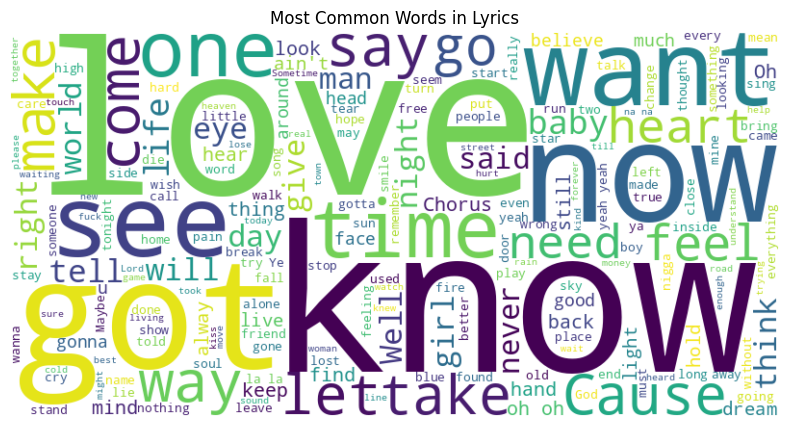

In [20]:
#plotting in matplotlib format
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

**Data Preprocessing**

In [21]:
# download nltk data
nltk.download('punkt')           # module used for sentence tokenization
nltk.download('punkt_tab')
nltk.download('stopwords')      # basic english words but not that menaingful eg- the, in, a etc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop_words = set(stopwords.words('english'))

In [23]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)   #re stands for regular expression
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [24]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [25]:
df.head()

,artist,song,text,cleaned_text
0,Helloween,Sun 4 The World,Forty million years ago \r\nThere was a boy c...,forty million years ago boy called leif skin g...
1,Quiet Riot,Picking Up The Pieces,"Take cover, young lovers, \r\nFall apart at t...",take cover young lovers fall apart seams stain...
2,Xandria,Ginger,Something infests me when I'm alone \r\nIt's ...,something infests im alone lunacy want vomit s...
3,Kid Rock,I'm A Dog,See me ride across the country with my shotty ...,see ride across country shotty ridin shotgun g...
4,Whiskeytown,Choked Up,I don't know why we can't talk \r\nEvery time...,dont know cant talk every time try get choked ...


In [29]:
# Vectorization with TF-IDF (term frequency and invert document frequency is used to convert textual data into
# numerical features for machine learning and information retrieval tasks.)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [27]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [28]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [37]:
df["song"][10]

'Love Me No More'

In [38]:
# Example Recommendation
print("\nRecommendations for the song 'Love Me No More':")
recommendations = recommend_songs("Love Me No More") # df["song"][10]
print(recommendations)


Recommendations for the song 'Love Me No More':
              artist                                               song
7300           Ne-Yo                             Don't Wanna Be In Love
8045        Kid Rock                                            So Hott
1383      Kanye West  I Just Wanna Love U (Offcial Kanye West Mumtri...
9516        Westlife                                           Miss You
14818  Lionel Richie                              I Wanna Take You Down
